In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# import scipy.stats as st


# URL of the CSV file on GitHub
github_csv_url = "https://raw.githubusercontent.com/ILoveSpreadsheetsMoreThanImAllowedToSay/Project_01/main/Resources/mental-heath-in-tech-clean.csv"


# Read the mouse data and the study results
df_generic = pd.read_csv(github_csv_url)


Section to investigate the following:

Breakdown of mental health resource seeking by gender 
Who seeks mental health resources more often: remote or in-person employees?

In [2]:
# Read the CSV file into a DataFrame
gender_remote_columns = ["What is your gender?", "Do you currently have a mental health disorder?",
                    "Is your employer primarily a tech company/organization?",
                    "Is your primary role within your company related to tech/IT?",
                    "Do you work remotely?"]
df_gender_remote = df_generic[gender_remote_columns].copy()
df_gender_remote


,What is your gender?,Do you currently have a mental health disorder?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you work remotely?
0,Male,No,1.0,NaN,Sometimes
1,Male,Yes,1.0,NaN,Never
2,Male,No,1.0,NaN,Always
3,Male,Yes,NaN,NaN,Sometimes
4,Female,Yes,0.0,1.0,Sometimes
...,...,...,...,...,...
1428,Female,No,NaN,NaN,Sometimes
1429,Male,No,NaN,NaN,Sometimes
1430,Male,Maybe,1.0,NaN,Sometimes
1431,Female,Yes,0.0,1.0,Sometimes


In [3]:

# Columns to extract and their new names
gender_remote_extract = {
    "What is your gender?": "Gender",
    "Do you currently have a mental health disorder?": "Mental_Status",
    "Is your employer primarily a tech company/organization?": "Company_Type",
    "Is your primary role within your company related to tech/IT?": "Role_Type",
    "Do you work remotely?": "Work_type"
}

# Rename the columns
df_gender_remote.rename(columns=gender_remote_extract, inplace=True)
df_gender_remote

,Gender,Mental_Status,Company_Type,Role_Type,Work_type
0,Male,No,1.0,NaN,Sometimes
1,Male,Yes,1.0,NaN,Never
2,Male,No,1.0,NaN,Always
3,Male,Yes,NaN,NaN,Sometimes
4,Female,Yes,0.0,1.0,Sometimes
...,...,...,...,...,...
1428,Female,No,NaN,NaN,Sometimes
1429,Male,No,NaN,NaN,Sometimes
1430,Male,Maybe,1.0,NaN,Sometimes
1431,Female,Yes,0.0,1.0,Sometimes


In [4]:

# Create a new column based on the conditions
df_gender_remote["Tech_Check"] = (df_gender_remote["Company_Type"] == 1) | (df_gender_remote["Role_Type"] == 1)
# df_gender_remote["Tech_Check"] = df_gender_remote["Tech_Check"].astype(int)
df_gender_remote = df_gender_remote[df_gender_remote["Tech_Check"] == True]
df_gender_remote = df_gender_remote[df_gender_remote["Gender"] != "Unspecified"]

work_type = {
    "Never": "In-person",
    "Sometimes": "Hybrid",
    "Always": "Remote"
}
df_gender_remote.loc[:, "Work_type"] = df_gender_remote["Work_type"].replace(work_type)
df_gender_mental = df_gender_remote.copy()
df_gender_mental = df_gender_mental[df_gender_mental["Mental_Status"] != "No"]

# Print the updated DataFrame
#df_gender_mental
df_gender_mental



,Gender,Mental_Status,Company_Type,Role_Type,Work_type,Tech_Check
1,Male,Yes,1.0,NaN,In-person,True
4,Female,Yes,0.0,1.0,Hybrid,True
5,Male,Yes,1.0,NaN,Hybrid,True
7,Female,Yes,1.0,NaN,Remote,True
8,Female,Yes,0.0,1.0,Hybrid,True
...,...,...,...,...,...,...
1426,Female,Yes,1.0,NaN,Hybrid,True
1427,Female,Yes,1.0,NaN,Remote,True
1430,Male,Maybe,1.0,NaN,Hybrid,True
1431,Female,Yes,0.0,1.0,Hybrid,True


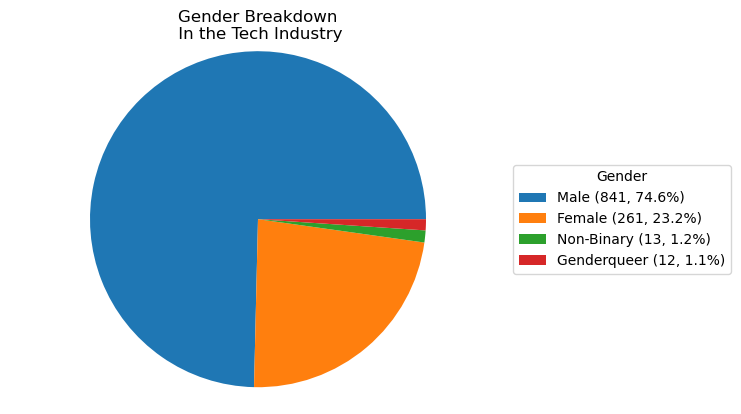

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot_pie = df_gender_remote["Gender"].value_counts()
labels = gender_pyplot_pie.index
sizes = gender_pyplot_pie.values

# Create the pie chart without labels and percentages
wedges, texts, autotexts = plt.pie(sizes, labels=None, autopct="",  pctdistance=0.85)

plt.title("Gender Breakdown\n In the Tech Industry", loc='center', y=1.0,  verticalalignment='center')
plt.axis('equal')

# Add a clean legend with percentages and counts
legend_labels = [f"{label} ({size}, {size/sum(sizes)*100:.1f}%)"
                 for label, size in zip(labels, sizes)]
plt.legend(title="Gender", labels=legend_labels, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

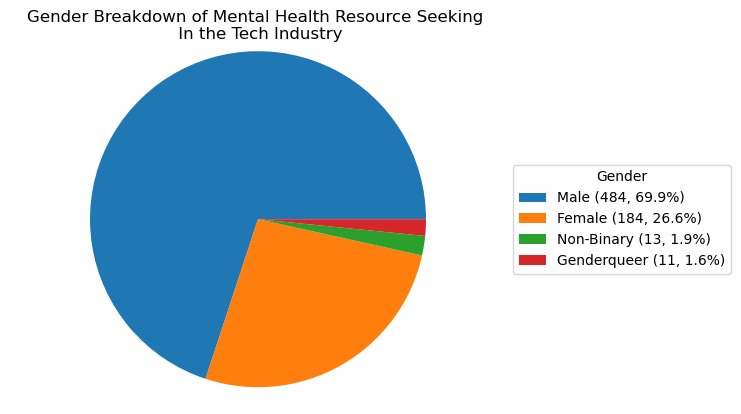

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_mental_pyplot_pie = df_gender_mental["Gender"].value_counts()
labels = gender_mental_pyplot_pie.index
sizes = gender_mental_pyplot_pie.values

# Create the pie chart without labels and percentages
wedges, texts, autotexts = plt.pie(sizes, labels=None, autopct="",  pctdistance=0.85)

plt.title("Gender Breakdown of Mental Health Resource Seeking \n In the Tech Industry", loc='center', y=1.0,  verticalalignment='center')
plt.axis('equal')

# Add a clean legend with percentages and counts
legend_labels = [f"{label} ({size}, {size/sum(sizes)*100:.1f}%)"
                 for label, size in zip(labels, sizes)]
plt.legend(title="Gender", labels=legend_labels, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [7]:

# Create two Series
Industry = df_gender_remote["Gender"].value_counts()
MHR = df_gender_mental["Gender"].value_counts()

# Create a DataFrame by combining the two Series
combined_df = pd.DataFrame({
                            "Industry": Industry,
                            "MHR Seekers": MHR})

# Calculate totals and create a new row
totals = combined_df.sum(numeric_only=True)

# Convert totals to a DataFrame and append to the original DataFrame
# Convert totals to a DataFrame
totals_df = pd.DataFrame([totals], index=["Totals"])

# Combine DataFrames using pd.concat()
combined_df = pd.concat([combined_df, totals_df])

# Replace the value 0 in the index with "Totals"
combined_df = combined_df.rename(index={0: "Totals"})

# Print the combined DataFrame
# Calculate the division and create a new column as a percentage
combined_df["DivisionPercentage"] = (combined_df["MHR Seekers"] / combined_df["Industry"]) * 100

# Format the DivisionPercentage column as a percentage with two decimal places
combined_df["DivisionPercentage"] = combined_df["DivisionPercentage"].apply("{:.2f}%".format)
combined_df = combined_df.rename(index={0: "Totals"})
combined_df

,Industry,MHR Seekers,DivisionPercentage
Male,841,484,57.55%
Female,261,184,70.50%
Non-Binary,13,13,100.00%
Genderqueer,12,11,91.67%
Totals,1127,692,61.40%


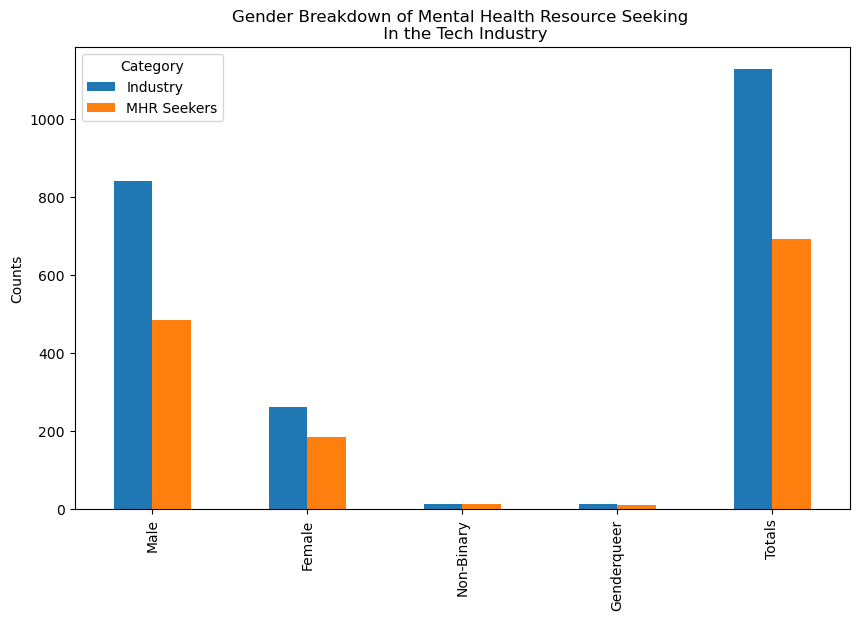

In [8]:

# Remove the DivisionPercentage column for plotting
plot_df = combined_df.drop(columns=["DivisionPercentage"])

# Create a bar chart
ax = plot_df.plot(kind="bar", figsize=(10, 6))

# Add labels and title
plt.ylabel("Counts")
plt.title("Gender Breakdown of Mental Health Resource Seeking \n In the Tech Industry")

# Show the legend
plt.legend(title="Category")

# Display the chart
plt.show()


## Line and Scatter Plots

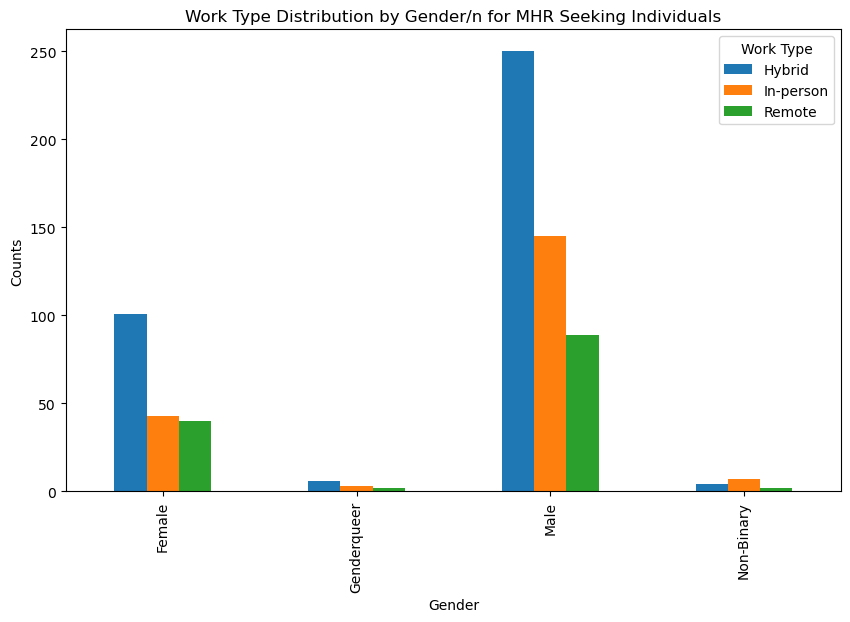

In [9]:
#Assistance on this one came from https://stackoverflow.com/questions/39013425/multiple-stacked-bar-plot-with-pandas
# Documentation for unstack from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html

work_type = df_gender_mental.copy()

# Group by 'Gender' and 'Work_type' and calculate the counts
work_type_counts = work_type.groupby(["Gender", "Work_type"]).size().unstack()

# Create a bar chart
ax = work_type_counts.plot(kind="bar", figsize=(10, 6))

# Add labels and title
plt.ylabel("Counts")
plt.title("Work Type Distribution by Gender/n for MHR Seeking Individuals")

# Show the legend
plt.legend(title="Work Type")

# Display the chart
plt.show()
